# Aircraft analysis

## Introduction

In this analysis, data of aircraft crashes will be used to analyze the risk associated with types of aircrafts
##### * commercial aircrafts
##### * private aircrafts
    
## Objective

Find aircrafts with the highest and lowest risk by make, model, category and manufacturer
#####  * which commercial aircraft has the highest and lowest risk
#####  * which private aircraft has the highest and lowest risk
#####  * what is the survival rate of passengers on each type of aircraft
#####  * which manufacturer makes the lowest risk aircraft
    

### Import the pandas and matplotlib module and assign to alias

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet
from rich.console import Console
from rich.table import Table

%matplotlib inline


### Checking for encoding of csv file

making sure we know the encoding of the file that we will be using so we can make sure we  use the .read_csv() correctly

In [25]:
# using chardet module to detect the files encoding type
# Read a sample of the file

with open("AviationData.csv", "rb") as file:
    result = chardet.detect(file.read(100000))
    print(result)

#df = pd.read_csv("AviationData.csv", encoding=result['encoding'])


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


### Encoding of source data

as we can see above that encoding type is 'ascii',  but instructing the .read_csv() module to open in ascii returns errors due to columns 6, 7 and 28 having dtypes that are not recognized in ascii. after doing some research, the unknown characters to ascii were known to windows-1252 or cp-1252. low_memory=False to prevent a warning message from appearing. For better control, chunksize flag can be specified 

In [26]:
aviation_data = pd.read_csv('AviationData.csv', encoding = 'cp1252', low_memory=False)
aviation_data.shape

pd.set_option('display.max_columns', None)
aviation_data.tail(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


### Subsetting data

All data in the source file has no use for our objective, therefore only data that can answer our questions will be used. lets also get some info about the data in order to know the columns we will be using

In [27]:
# creating subset of aviation_data that are relevant to analyzing safety risk. may add more if necassary

data_subset = aviation_data.iloc[:,[0,2,3,4,10,11,12,14,15,17,18,21,23,24,25,26,27,30]]

data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

In [28]:
data_subset.head(5)


,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,19-09-1996
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,26-02-2007
3,20001218X45448,LAX96LA321,1977-06-19,"EUREKA, CA",Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,12-09-2000
4,20041105X01764,CHI79FA064,1979-08-02,"Canton, OH",Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,16-04-1980


### Missing Data

There are some numerical columns that has missing data. We want to preserve the balance of overal data, so I would choose to use the mean to fill in missing values 

In [29]:
data_subset = data_subset.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

data_subset.update(data_subset.iloc[:, 12:16].apply(pd.to_numeric, errors='coerce').round(0).astype('Int64'))

data_subset.info()

#data_subset.fillna(data_subset.median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       88889 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    88889 non-null  object 
 13  Total.Serious.Injuries  88889 non-null  object 
 14  Total.Minor.Injuries    88889 non-null

### Injuries of all levels

lets add a new column named ' Total.Injuries ' next to all types of injuries to get a general number for all injuries sustained for each observation. We will use this to calculate aircraft passenger survival rate.

In [30]:
data_subset.insert(loc=15, column='Total.Injuries', value=data_subset[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum(axis=1))
                   
#data_subset.head(2)
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       88889 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    88889 non-null  object 
 13  Total.Serious.Injuries  88889 non-null  object 
 14  Total.Minor.Injuries    88889 non-null

In [48]:
#lets get rid of NaN from 'Aircraft.Category'. we know that this has to be a categorical type of data, so would rather have
# 'Unkown' instead
data_subset['Aircraft.Category'] = data_subset['Aircraft.Category'].fillna('Unknown')
data_subset.head(3)

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Private_or_Commercial,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Airplane,Stinson,108-3,1.0,Reciprocating,Personal,Private,2,0,0,2.0,0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Airplane,Piper,PA24-180,1.0,Reciprocating,Personal,Private,4,0,0,4.0,0,UNK,19-09-1996
2,20061025X01555,NYC07LA005,1974-08-30,"Saltville, VA",Fatal(3),Destroyed,Airplane,Cessna,172M,1.0,Reciprocating,Personal,Private,3,0,0,3.0,5,IMC,26-02-2007


### What type of aircrafts has the highest and lowest risk?

Lets group the aircrafts by category then by damage. Damage will be on the y axis and category will be on the x axis.
Based on the graph below some aircrafts has no damage history. But lowest to highest risk are: Glider, Helicopter, Airplane, and unkown.

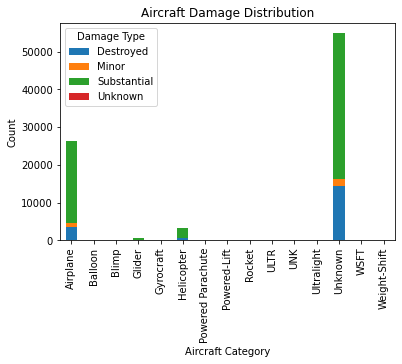

In [32]:
damage_counts = data_subset.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='Count')

pivot_table = damage_counts.pivot(index='Aircraft.Category', columns='Aircraft.damage', values='Count')

# Bar chart (uncomment)
#pivot_table.plot(kind='bar')
# Stacked bar chart
pivot_table.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage Distribution')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.legend(title='Damage Type')
plt.show()


Suprisingly, there are a lot of unknown aircraft in the graph shown above. manually looking at the data, I noticed some entries has 'Unkown' value in the Aircraft.Category. At the same time in the same entry the Make and Model columns has values in them. for example a 'Unkown' value is present for Aircraft.Category column, 'Cessna' value for a Make column and '140' for a Model column is present, but for another entry with the Model being different such as having '180', the Aircraft.Category has a 'unknown' value. I did some research and discovered that a Cessna 140 and 180 looks pretty much the same. I decided to use deductive reasoning to categorize some aircrafts with reference to other columns values.

In [33]:
df = data_subset

# Create a mapping from 'Make' & 'Model' to 'Aircraft.Category' where category is not 'Unknown'
category_mapping = (
    df[df['Aircraft.Category'].notna() & (df['Aircraft.Category'] != 'Unknown')]
    .groupby(['Make', 'Model'])['Aircraft.Category']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)  # Get most frequent category
    .dropna()
)

# Replace 'Unknown' values by mapping 'Make' & 'Model' combinations
mask = df['Aircraft.Category'].isin(['Unknown', None])  # Identify 'Unknown' rows
df.loc[mask, 'Aircraft.Category'] = df.loc[mask, ['Make', 'Model']].apply(
    lambda row: category_mapping.get((row['Make'], row['Model'])), axis=1
)

# Fill remaining 'Unknown' values based only on 'Make' if 'Model' didn't find a match
category_mapping_make = (
    df[df['Aircraft.Category'].notna() & (df['Aircraft.Category'] != 'Unknown')]
    .groupby('Make')['Aircraft.Category']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
    .dropna()
)

df.loc[mask, 'Aircraft.Category'] = df.loc[mask, 'Make'].map(category_mapping_make)


Now lets graph the values again and see how many more unknown values has been filled with the airplane value in Aircraft.Category column

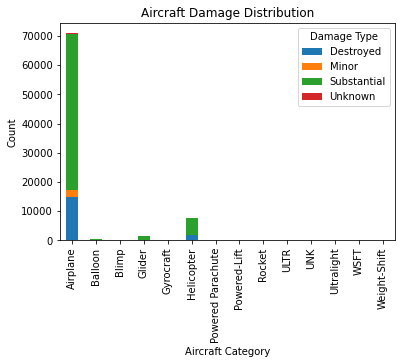

In [34]:
damage_counts = data_subset.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='Count')

pivot_table = damage_counts.pivot(index='Aircraft.Category', columns='Aircraft.damage', values='Count')

# Bar chart (uncomment)
#pivot_table.plot(kind='bar')
# Stacked bar chart
pivot_table.plot(kind='bar', stacked=True)
plt.title('Aircraft Damage Distribution')
plt.xlabel('Aircraft Category')
plt.ylabel('Count')
plt.legend(title='Damage Type')
plt.show()


I wanted to make sure that actual airplanes did not have 'Nan' values anymore so I created a dataframe with random samples of data to see if an actual airplane would have the 'Nan' value. if a make and model shows up with a 'Nan' value, I would research the make and model to see if it actually looks like an airplane.

In [35]:
df = data_subset
# Filter rows where 'Aircraft.Category' is NaN
nan_category_df = df[df['Aircraft.Category'].isna()]

# Create a new dataset with a random sample of 10 rows (Change n as needed)
nan_category_sample_df = nan_category_df.sample(n=10)

# Display the new dataset
nan_category_sample_df.head(10)


,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
42838,20001208X08969,CHI98LA009,1997-10-06,"GREEN BAY, WI",Non-Fatal,Substantial,NaN,Brown,AIR SHARK III,1.0,Reciprocating,Personal,0,0,0,0.0,1,VMC,21-05-1998
10936,20001214X35759,MIA85LA104,1985-02-23,"HOLLYWOOD, FL",Non-Fatal,Substantial,NaN,Auton - Dunham,RUTAN LONG EZ,1.0,Reciprocating,Personal,0,0,0,0.0,2,VMC,NaN
9691,20001214X41107,LAX84FU033,1984-09-07,"LOWERLAKE, CA",Fatal(1),NaN,NaN,Pioneer,FLIGHTSTAR,1.0,Reciprocating,Personal,1,0,0,1.0,0,VMC,NaN
21526,20001213X26825,FTW88DPJ13,1988-09-24,"ARDMORE, OK",Non-Fatal,Substantial,NaN,Nord (sncan),1101,1.0,Reciprocating,Personal,0,2,0,2.0,0,VMC,24-01-1990
19722,20001213X25042,DEN88DQA02,1988-02-23,"LOS LUNAS, NM",Non-Fatal,Substantial,NaN,Shiner,PITTS S-1S,1.0,Reciprocating,Personal,0,0,1,1.0,0,VMC,10-07-1989
31336,20001211X15639,CHI92DEP05,1992-09-02,"SHIOCTON, WI",Non-Fatal,Substantial,NaN,Reif,AVID FLYER,1.0,Reciprocating,Personal,0,0,0,0.0,2,VMC,26-07-1993
27932,20001212X16934,CHI91DEM05,1991-05-09,"IONIA, MI",Non-Fatal,Substantial,NaN,Gildersleeve,RV-4,1.0,Reciprocating,Personal,0,1,0,1.0,0,VMC,09-03-1993
34126,20001211X13681,ATL94LA013,1993-11-10,"COWPENS, SC",Non-Fatal,Substantial,NaN,Bowermaster,B-8M,1.0,Reciprocating,Personal,0,1,0,1.0,0,VMC,02-12-1994
29185,20001212X18091,DEN91LA134,1991-09-27,"RATON, NM",Non-Fatal,Substantial,NaN,Abernathy,LONG-EZ,1.0,Reciprocating,Personal,0,1,0,1.0,0,VMC,03-05-1993
7146,20001214X45321,LAX84FA125,1983-12-31,"LANCASTER, CA",Fatal(1),Destroyed,NaN,Striplin,SKY RANGER,1.0,Reciprocating,Unknown,1,0,0,1.0,0,VMC,NaN


### which aircraft has the highest and lowest risk between private and commercial

the business problem also specifies private and commercial aircrafts. The only column in the data that can be used to determine a private or commercial aircraft is the 'Purpose.of.flight' column. There are several values in this columns that does not specifically point to either category, so some research had to be done in order to categorize every value in this column into a private or commercial value. This step is at my descretion and can skew the data. I may potentially re-classify some of 'Purpose.of.Flight' from private to commercial and or the other way around.

Lets create a dictionary that contains the 'Purpose.of.Flight' column values to either Private, Commercial or Unknown

In [36]:
# Define the mapping dictionary
purpose_mapping = {
    'Personal': 'Private',
    'Business': 'Private',
    'Instructional': 'Private',
    'Executive/corporate': 'Private',
    'Skydiving': 'Private',
    'Other Work Use': 'Private',
    'Glider Tow': 'Private',
    'Air Race/show': 'Private',

    'Ferry': 'Commercial',
    'Aerial Observation': 'Commercial',
    'Aerial Application': 'Commercial',
    'Public Aircraft': 'Commercial',
    'Public Aircraft - Federal': 'Commercial',
    'Public Aircraft - Local': 'Commercial',
    'Public Aircraft - State': 'Commercial',
    'External Load': 'Commercial',
    'Banner Tow': 'Commercial',
    'Firefighting': 'Commercial',
    'Air Drop': 'Commercial',
    'Positioning': 'Commercial',
    'Flight Test': 'Commercial'
}

In [37]:
# Creating a new column by mapping values
data_subset['Private_or_Commercial'] = data_subset['Purpose.of.flight'].map(purpose_mapping)

# Filling any unmapped values with 'Unknown'
data_subset['Private_or_Commercial'].fillna('Unknown', inplace=True)

# Would rather this new column is next to the Purpose.of.flight column
data_subset.insert(12, 'Private_or_Commercial', data_subset.pop('Private_or_Commercial'))

data_subset.head(2)

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Private_or_Commercial,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",Fatal(2),Destroyed,Airplane,Stinson,108-3,1.0,Reciprocating,Personal,Private,2,0,0,2.0,0,UNK,NaN
1,20001218X45447,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",Fatal(4),Destroyed,Airplane,Piper,PA24-180,1.0,Reciprocating,Personal,Private,4,0,0,4.0,0,UNK,19-09-1996


Lets group by the Private_or_Commercial and Aircraft.damage in order show a visual representation of the answer to our question  (what aircraft has the highest and lowest risk between private and commercial). We can see below that a majority of the aircrafts that got damages are in the private aircraft category.

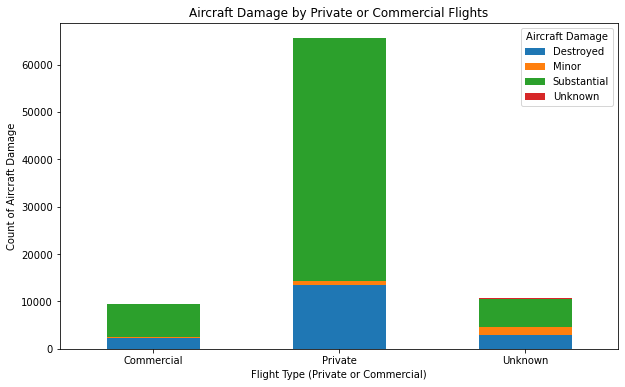

In [38]:

# Count occurrences of each Aircraft.damage type within Private_or_Commercial categories
damage_counts = data_subset.groupby(['Private_or_Commercial', 'Aircraft.damage']).size().unstack()

# Plot the data as a bar chart
damage_counts.plot(kind='bar', figsize=(10, 6), stacked=True)

# Set labels and title
plt.xlabel("Flight Type (Private or Commercial)")
plt.ylabel("Count of Aircraft Damage")
plt.title("Aircraft Damage by Private or Commercial Flights")
plt.xticks(rotation=0)

# Add legend
plt.legend(title="Aircraft Damage")

# Show the plot
plt.show()


The data available dates back as early as 1948. The service life of an airplane is 20 to 30 years, so lets focus on only plane 'Event.Date' within the last 20 years. I would even say only last 10 years, but that may drastically decrease our data set. Also based on our intended use of an aircraft, airplanes are the only suitable type of aircraft, so lets create a new dataframe that has only 'airplane' in the 'Aircraft.Category' column

In [39]:
ap_after_2004 = data_subset[(data_subset['Aircraft.Category'] == 'Airplane')
                & (data_subset['Event.Date'] >= '2005-01-01')].copy()

# removed decimals from 'Number.of.Engines'
ap_after_2004['Number.of.Engines'] = ap_after_2004['Number.of.Engines'].astype(int)
#ap_after_2004.update(ap_after_2004.iloc[:, 13:18].apply(pd.to_numeric, errors='coerce').round(0).astype('Int64'))


#ap_after_2004.iloc[:,13:19] = ap_after_2004.iloc[:,13:19].astype(int)
ap_after_2004.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Private_or_Commercial,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
58015,20050119X00067,IAD05LA030,2005-01-01,"FALMOUTH, MA",Non-Fatal,Substantial,Airplane,Beech,G35,1,Reciprocating,Personal,Private,1,0,0,1.0,2,VMC,28-04-2005
58016,20050119X00068,IAD05LA029,2005-01-01,"POUGHKEEPSIE, NY",Non-Fatal,Substantial,Airplane,Cessna,172L,1,Reciprocating,Personal,Private,1,0,0,1.0,1,VMC,28-04-2005
58017,20050106X00025,CHI05LA050,2005-01-01,"AINSWORTH, NE",Non-Fatal,Substantial,Airplane,Cessna,551,2,Turbo Fan,Personal,Private,1,0,2,3.0,3,IMC,31-07-2006
58018,20050111X00034,ANC05LA021,2005-01-01,"CHICKALOON, AK",Non-Fatal,Substantial,Airplane,Maule,M-7,1,Reciprocating,Personal,Private,1,2,2,5.0,5,VMC,20-12-2005
58019,20050106X00023,LAX05FA058,2005-01-02,"PALO ALTO, CA",Non-Fatal,Substantial,Airplane,Piper,PA-46-350P,1,Reciprocating,Personal,Private,1,0,1,2.0,3,VMC,25-04-2006


### which manufacturer makes the lowest risk aircraft

unfortunately the data set does not have a column for manufacturers. Intuitively I attempted to plot 'Total.Injuries' against 'Make', but there are thousands of unique makes in the 'Make' column and does not plot a good graph. I was hoping to get a risk profile based on manufacturer. I decided to substitute 'Make' with 'Number.of.Engines' column

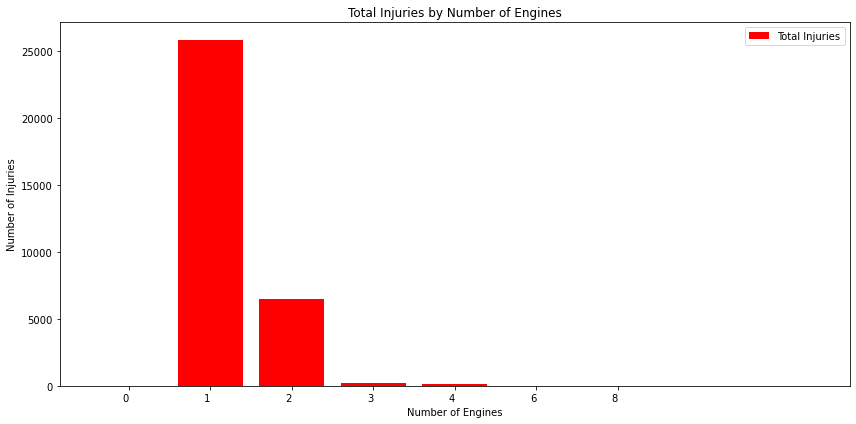

In [40]:
# Group by 'Make', summing up injuries
grouped_df = ap_after_2004.groupby(['Number.of.Engines'])[['Total.Injuries']].sum().reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart for Total Injuries
ax.bar(grouped_df['Number.of.Engines'], grouped_df['Total.Injuries'], color='red', label='Total Injuries')

# X-axis labels (Make)
ax.set_xticks(range(len(grouped_df)))
ax.set_xticklabels(grouped_df['Number.of.Engines'], ha="right")

# Labels and title
ax.set_xlabel('Number of Engines')
ax.set_ylabel('Number of Injuries')
ax.set_title('Total Injuries by Number of Engines')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


In [41]:
grouped_df.head()

,Number.of.Engines,Total.Injuries
0,0,1.0
1,1,25858.0
2,2,6498.0
3,3,222.0
4,4,125.0


The code below plots a graph of Total injuries by engine type. Reciprocating engine types by far are the most the most total injuries associated with it and Turbo jet has the least. 

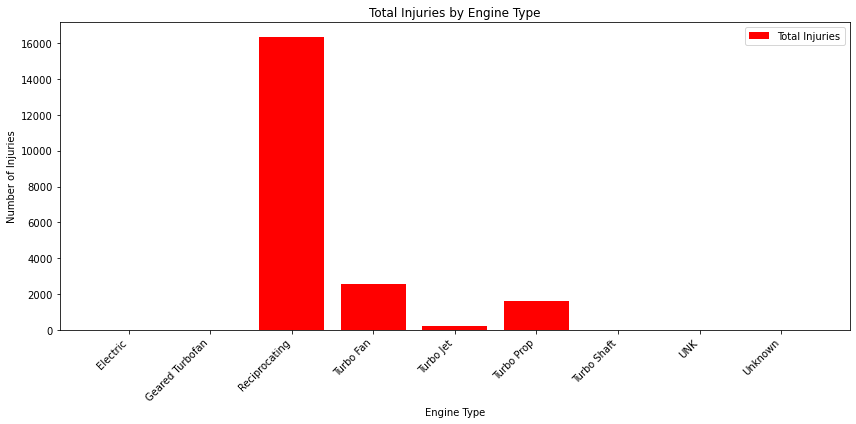

In [42]:
grouped_df = ap_after_2004.groupby('Engine.Type')[['Total.Injuries']].sum().reset_index()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart for Total Injuries by Engine Type
bars = ax.bar(grouped_df['Engine.Type'], grouped_df['Total.Injuries'], color='red', label='Total Injuries')

# Set proper x-ticks and labels
ax.set_xticks(range(len(grouped_df)))  # Set tick positions
ax.set_xticklabels(grouped_df['Engine.Type'], rotation=45, ha="right")  # Set tick labels

# Labels and title
ax.set_xlabel('Engine Type')
ax.set_ylabel('Number of Injuries')
ax.set_title('Total Injuries by Engine Type')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


### what is the the survival rate of passengers on each type of airplane

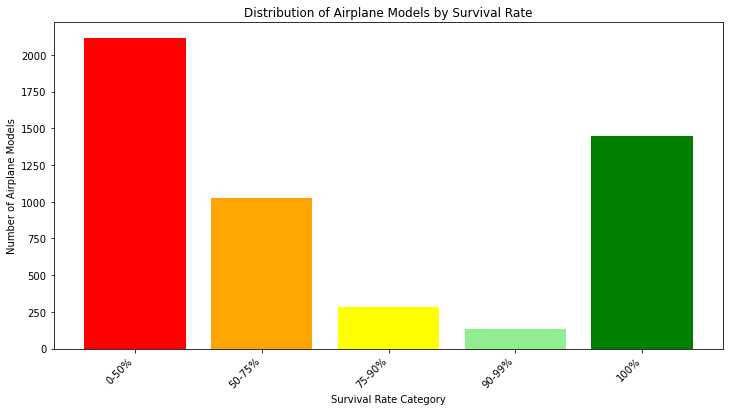

                        Airplane Models by Survival Rate Category                        
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Survival Category ┃ Airplane Models                                                   ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       0-50%       │ CP 65, 28, CH750 STOL, COMP AIR 1, Aerostar 601...                │
├───────────────────┼───────────────────────────────────────────────────────────────────┤
│      50-75%       │ S2R T34, JR. SR, Tailwind, LUSCOMBE 8E, PA-22/20...               │
├───────────────────┼───────────────────────────────────────────────────────────────────┤
│      75-90%       │ 7DC, 525B, A 1B, DC-3T, AA 5...                                   │
├───────────────────┼───────────────────────────────────────────────────────────────────┤
│      90-99%       │ DHC-8-202, 777 - 236, A319 132, 777-236ER, 767-232...             │
├───────────────────┼───────────────────────────────────────────────────────────────────┤
│       100%        │ HPL 1 HIGH WING PARA, PA-20/22, PA-18 225DD, PA-18 Replica, BL... │
└───────────────────┴───────────────────────────────────────────────────────────────────┘

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from rich.console import Console
from rich.table import Table

# Load dataset (replace with actual filename)
df = ap_after_2004

# Filter only 'Airplane' category
df_airplane = df[df['Aircraft.Category'] == 'Airplane'].copy()

# Ensure numerical columns have no NaN values
df_airplane[['Total.Injuries', 'Total.Uninjured']] = df_airplane[['Total.Injuries', 'Total.Uninjured']].fillna(0)

# Create 'Total.Passengers' column
df_airplane['Total.Passengers'] = df_airplane['Total.Injuries'] + df_airplane['Total.Uninjured']

# Remove rows where Total.Passengers is 0 to avoid division errors
df_airplane = df_airplane[df_airplane['Total.Passengers'] > 0]

# Compute survival rates for each Airplane Model
survival_by_model = df_airplane.groupby('Model')[['Total.Injuries', 'Total.Uninjured', 'Total.Passengers']].sum()
survival_by_model['Survival Rate'] = survival_by_model['Total.Uninjured'] / survival_by_model['Total.Passengers']

# Sort models by Survival Rate
survival_by_model = survival_by_model.sort_values('Survival Rate', ascending=False)

# Define survival rate ranges (bins) and labels
bins = [0, 0.5, 0.75, 0.9, 0.99, 1.0]  
labels = ["0-50%", "50-75%", "75-90%", "90-99%", "100%"]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']  # Matching colors for chart & text

# Assign each model to a survival category
survival_by_model['Survival Category'] = pd.cut(survival_by_model['Survival Rate'], bins=bins, labels=labels, include_lowest=True)

# Count how many airplane models fall into each survival category
category_counts = survival_by_model['Survival Category'].value_counts().sort_index()

# Plot grouped survival rates
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(category_counts.index, category_counts.values, color=colors)

ax.set_xlabel("Survival Rate Category")
ax.set_ylabel("Number of Airplane Models")
ax.set_title("Distribution of Airplane Models by Survival Rate")
ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts.index, rotation=45, ha="right")

plt.show()

# Use Rich to display a table with model names per category, matching colors
console = Console()

table = Table(title="Airplane Models by Survival Rate Category", show_lines=True)
table.add_column("Survival Category", justify="center", style="bold cyan")
table.add_column("Airplane Models", justify="left")

# Loop through each category, applying corresponding color
for category, color in zip(labels, colors):
    models_in_category = survival_by_model[survival_by_model['Survival Category'] == category].index.tolist()
    model_display = ', '.join(models_in_category[:5]) + ('...' if len(models_in_category) > 5 else '')  # Show first 5 models per category
    
    # Apply the same color from the bar chart to the Rich text
    table.add_row(f"[{color}]{category}[/{color}]", f"[{color}]{model_display}[/{color}]")

console.print(table)


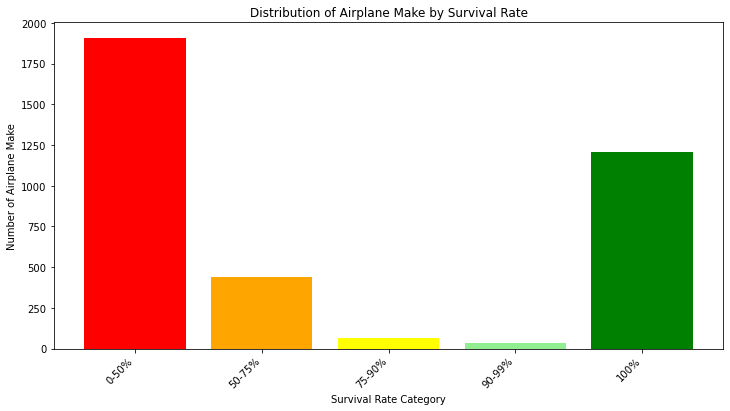

                                      Airplane Make by Survival Rate Category                                      
┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Survival Category ┃ Airplane Make                                                                               ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       0-50%       │ BYLER, Becerra, Barr, MEYER, Christer...                                                    │
├───────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│      50-75%       │ Micco Aircraft Company, AEROTEK, SHORT BROS. & HARLAND, Univar, BEAGLE...                   │
├───────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│      75-90%       │ American, DIAMOND AIRCRAFT IND GMBH, STEARMAN AIRCRAFT, Zenith, Embraer...                  │
├───────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│      90-99%       │ EMBRAER-EMPRESA BRASILEIRA DE, EMBRAER S.A., MCDONNELL DOUGLAS, EMBRAER S A, BOEING OF      │
│                   │ CANADA/DEHAV DIV...                                                                         │
├───────────────────┼─────────────────────────────────────────────────────────────────────────────────────────────┤
│       100%        │ Skykits, DEARMOND CLINT, SHANKS V ROGER, DIAMOND AIRCRAFT, SHAFFER WILLIAM C...             │
└───────────────────┴─────────────────────────────────────────────────────────────────────────────────────────────┘

In [44]:
# Load dataset (replace with actual filename)
df = ap_after_2004

# Filter only 'Airplane' category
df_airplane = df[df['Aircraft.Category'] == 'Airplane'].copy()

# Ensure numerical columns have no NaN values
df_airplane[['Total.Injuries', 'Total.Uninjured']] = df_airplane[['Total.Injuries', 'Total.Uninjured']].fillna(0)

# Create 'Total.Passengers' column
df_airplane['Total.Passengers'] = df_airplane['Total.Injuries'] + df_airplane['Total.Uninjured']

# Remove rows where Total.Passengers is 0 to avoid division errors
df_airplane = df_airplane[df_airplane['Total.Passengers'] > 0]

# Compute survival rates for each Airplane Make (Manufacturer)
survival_by_make = df_airplane.groupby('Make')[['Total.Injuries', 'Total.Uninjured', 'Total.Passengers']].sum()
survival_by_make['Survival Rate'] = survival_by_make['Total.Uninjured'] / survival_by_make['Total.Passengers']

# Sort makes by Survival Rate
survival_by_make = survival_by_make.sort_values('Survival Rate', ascending=False)

# Define survival rate ranges (bins) and labels
bins = [0, 0.5, 0.75, 0.9, 0.99, 1.0]  
labels = ["0-50%", "50-75%", "75-90%", "90-99%", "100%"]
colors = ['red', 'orange', 'yellow', 'lightgreen', 'green']  # Matching colors for chart & text

# Assign each Make to a survival category
survival_by_make['Survival Category'] = pd.cut(survival_by_make['Survival Rate'], bins=bins, labels=labels, include_lowest=True)

# Count how many airplane manufacturers fall into each survival category
category_counts = survival_by_make['Survival Category'].value_counts().sort_index()

# Plot grouped survival rates
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(category_counts.index, category_counts.values, color=colors)

ax.set_xlabel("Survival Rate Category")
ax.set_ylabel("Number of Airplane Make")
ax.set_title("Distribution of Airplane Make by Survival Rate")
ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts.index, rotation=45, ha="right")
plt.show()

# Use Rich to display a table with manufacturer names per category, matching colors
console = Console()

table = Table(title="Airplane Make by Survival Rate Category", show_lines=True)
table.add_column("Survival Category", justify="center", style="bold cyan")
table.add_column("Airplane Make", justify="left")

# Loop through each category, applying corresponding color
for category, color in zip(labels, colors):
    makes_in_category = survival_by_make[survival_by_make['Survival Category'] == category].index.tolist()
    make_display = ', '.join(makes_in_category[:5]) + ('...' if len(makes_in_category) > 5 else '')  # Show first 5 makes per category
    
    # Apply the same color from the bar chart to the Rich text
    table.add_row(f"[{color}]{category}[/{color}]", f"[{color}]{make_display}[/{color}]")

console.print(table)


In [45]:
ap_after_2004.to_csv('Aviation_airplanes_after_2004.csv', index=False)

In [46]:
ap_after_2004.head()

,Event.Id,Accident.Number,Event.Date,Location,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Private_or_Commercial,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Injuries,Total.Uninjured,Weather.Condition,Publication.Date
58015,20050119X00067,IAD05LA030,2005-01-01,"FALMOUTH, MA",Non-Fatal,Substantial,Airplane,Beech,G35,1,Reciprocating,Personal,Private,1,0,0,1.0,2,VMC,28-04-2005
58016,20050119X00068,IAD05LA029,2005-01-01,"POUGHKEEPSIE, NY",Non-Fatal,Substantial,Airplane,Cessna,172L,1,Reciprocating,Personal,Private,1,0,0,1.0,1,VMC,28-04-2005
58017,20050106X00025,CHI05LA050,2005-01-01,"AINSWORTH, NE",Non-Fatal,Substantial,Airplane,Cessna,551,2,Turbo Fan,Personal,Private,1,0,2,3.0,3,IMC,31-07-2006
58018,20050111X00034,ANC05LA021,2005-01-01,"CHICKALOON, AK",Non-Fatal,Substantial,Airplane,Maule,M-7,1,Reciprocating,Personal,Private,1,2,2,5.0,5,VMC,20-12-2005
58019,20050106X00023,LAX05FA058,2005-01-02,"PALO ALTO, CA",Non-Fatal,Substantial,Airplane,Piper,PA-46-350P,1,Reciprocating,Personal,Private,1,0,1,2.0,3,VMC,25-04-2006
